In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#let's read csv file

In [6]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Titanic-Dataset.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

#Preproces data

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df=df.drop('Name',axis=1)

In [5]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert sex to numerical values

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df=df.drop(['Cabin','PassengerId'],axis=1)

In [15]:
df['Embarked'].dropna(inplace=True)

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df['Sex']=le.fit_transform(df['Sex'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,NaN,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


LET'S FILL NULL VALUE OF AGE

In [47]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Fit and transform the data
imputed_data = imputer.fit_transform(df)

# Convert the numpy array back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

In [48]:
df = df_imputed
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,523.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,596.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,669.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,49.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,101.0,13.0000,2.0
887,1.0,1.0,0.0,19.0,0.0,0.0,14.0,30.0000,2.0
888,0.0,3.0,0.0,26.0,1.0,2.0,675.0,23.4500,2.0
889,1.0,1.0,1.0,26.0,0.0,0.0,8.0,30.0000,0.0


In [49]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Split the data into training and test sets

In [50]:
X = df.drop(['Survived'],axis=1)

In [51]:
Y=df['Survived']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [54]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,523.0,7.2500,2.0
1,1.0,0.0,38.0,1.0,0.0,596.0,71.2833,0.0
2,3.0,0.0,26.0,0.0,0.0,669.0,7.9250,2.0
3,1.0,0.0,35.0,1.0,0.0,49.0,53.1000,2.0
4,3.0,1.0,35.0,0.0,0.0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,101.0,13.0000,2.0
887,1.0,0.0,19.0,0.0,0.0,14.0,30.0000,2.0
888,3.0,0.0,26.0,1.0,2.0,675.0,23.4500,2.0
889,1.0,1.0,26.0,0.0,0.0,8.0,30.0000,0.0


#Using Logistic Regressionession

In [55]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression = LogisticRegression()

In [56]:
model_LogisticRegression.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred=model_LogisticRegression.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.8268156424581006

In [63]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[92, 13],
       [18, 56]])

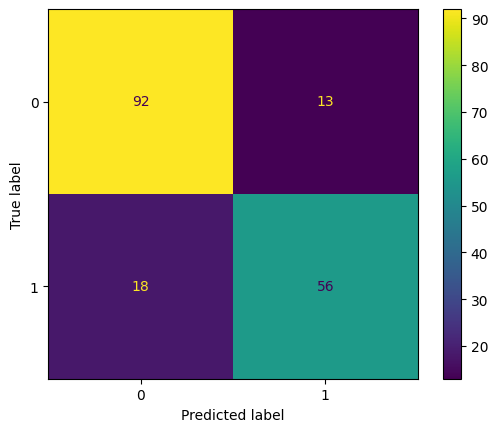

In [64]:
cm_display = ConfusionMatrixDisplay(cm).plot()

#Using Support Vector Machine (SVM)

In [65]:
from sklearn.svm import SVC

model_svm = SVC()

In [66]:
model_svm.fit(X_train, y_train)

SVC()

In [67]:
# Make predictions
y_pred_svm = model_svm.predict(X_test)

In [68]:

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', accuracy_svm)

SVM Accuracy: 0.7039106145251397


In [70]:
cm_SVM=confusion_matrix(y_test, y_pred_svm)
cm_SVM

array([[100,   5],
       [ 48,  26]])

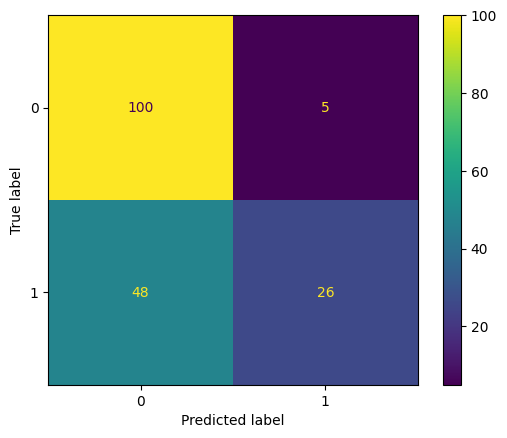

In [71]:
cm_display = ConfusionMatrixDisplay(cm_SVM).plot()

#Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

In [73]:
# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

In [74]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

Random Forest Accuracy: 0.8212290502793296


In [77]:
cm_rf=confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[92, 13],
       [19, 55]])

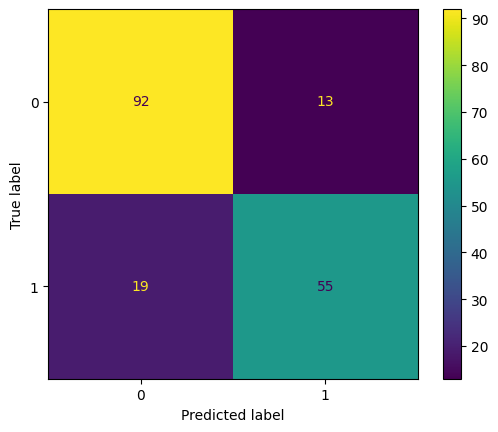

In [78]:
cm_display = ConfusionMatrixDisplay(cm_rf).plot()